***
## ***Adding Layers***
***

Neural networks become **“deep”** when they have 2 or more **hidden layers**. At the moment, we have just one layer, which is effectively an output layer. Currently, we have no hidden layers. A hidden layer is not an input or output layer, as the scientist, you see data as they are handed to the **input layer** and the resulting data from the **output layer**. Layers between these endpoints have values that we do not necessarily deal with, hence the name **“hidden”**. Do not let this name convince you that you can not access these values, though. You will often use them to diagnose issues or improve your neural network. To explore this concept, let’s add a layer to the neural network, and, for now, let’s assume these two layers that we are going to have will be the hidden layers, and we just have not coded our output layer yet.

In the case of the first layer, we can see that we have an input with 4 features.

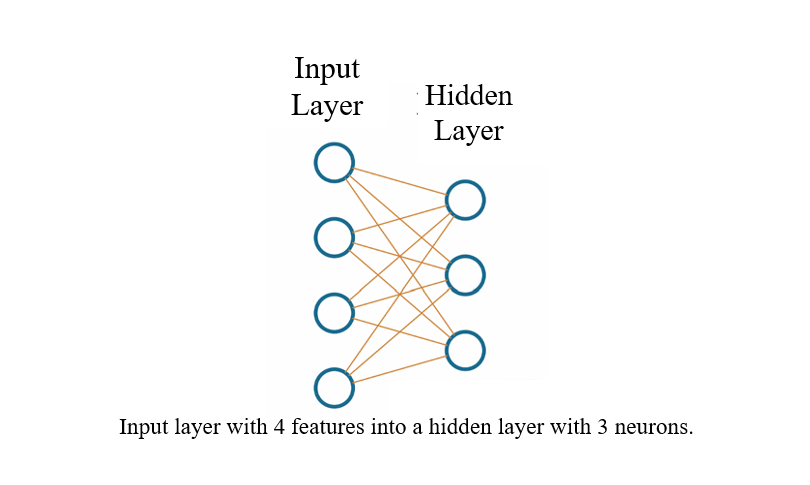

In [3]:

from IPython.display import Image
Image(filename='Input layer with 4 features into a hidden layer with 3 neurons.png') 


Ffeature set data get fed through the input, which does not change it in any way, to our first hidden layer, which we can see has 3 sets of weights, with 4 values each. Each of those 3 unique weight sets is associated with its distinct neuron. Thus, since we have 3
weight sets, we have 3 neurons in this first hidden layer. Each neuron has a unique set of weights, of which we have 4 (as there are 4 inputs to this layer), which is why our initial weights have a shape of (3,4)​.

Now, we wish to add **another layer**. To do that, we must make sure that the expected input to that layer matches the previous layer’s output. We have set the number of neurons in a layer by setting how many weight sets and biases we have. The previous layer’s influence on weight sets for the current layer is that each weight set needs to have a separate weight per input. 

To create this new layer, we are going create our weights and biases.

In [8]:

import numpy as np 
 
inputs = [[1, 2, 3, 2.5], 
          [2., 5., -1., 2], 
          [-1.5, 2.7, 3.3, -0.8]] 

weights = [[0.2, 0.8, -0.5, 1], 
           [0.5, -0.91, 0.26, -0.5], 
           [-0.26, -0.27, 0.17, 0.87]] 

biases = [2, 3, 0.5] 

weights2 = [[0.1, -0.14, 0.5], 
            [-0.5, 0.12, -0.33], 
            [-0.44, 0.73, -0.13]] 

biases2 = [-1, 2, -0.5] 
 
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases 
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2 
 
print(layer2_outputs)


[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


At this point, our neural network could be visually represented as: 

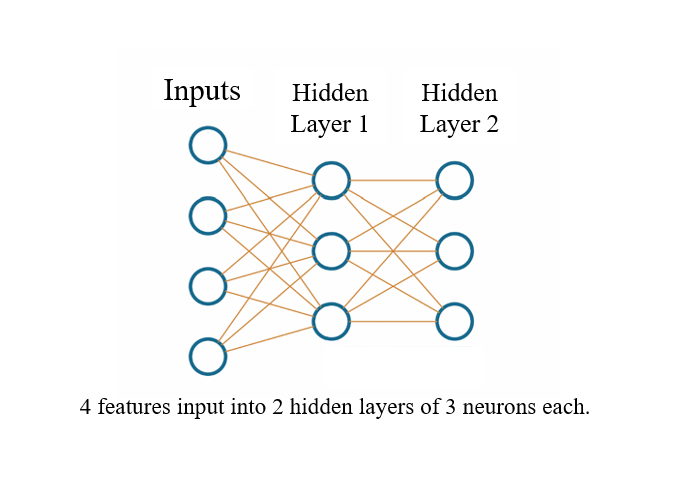

In [9]:

Image(filename='4 features input into 2 hidden layers of 3 neurons each.png') 


***
## **Training Data**
***

Next, rather than hand-typing in random data, we will use a function that can create non-linear data. What do we mean by non-linear? Linear data can be fit with or represented by a straight line.

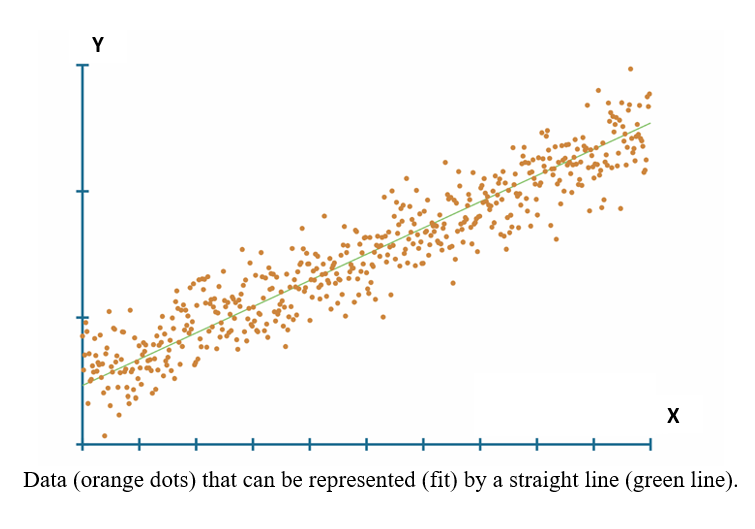

In [10]:

Image(filename='Linear data.png') 


Non-linear data cannot be represented well by a straight line.

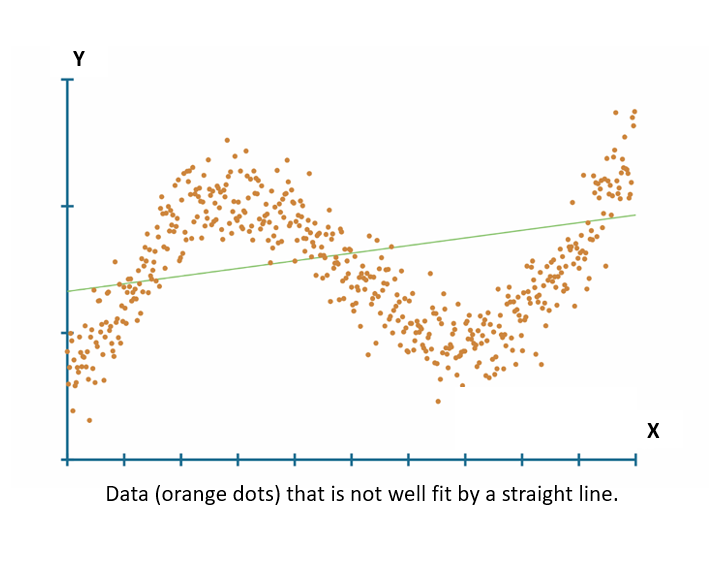

In [11]:

Image(filename='Non Linear Data.png') 


If you were to graph data points of the form (x, y)​ where y = f(x)​, and it looks to be a line with a clear trend or slope, then chances are, they are linear data! Linear data are very easily approximated by far simpler machine learning models than neural networks. What other machine learning algorithms cannot approximate so easily are non-linear datasets. To simplify this, we have created a Python package that you can install with pip, called **nnfs**​:

In [14]:

from nnfs.datasets import spiral_data


In [15]:

import numpy as np 
import nnfs 
nnfs.init() 


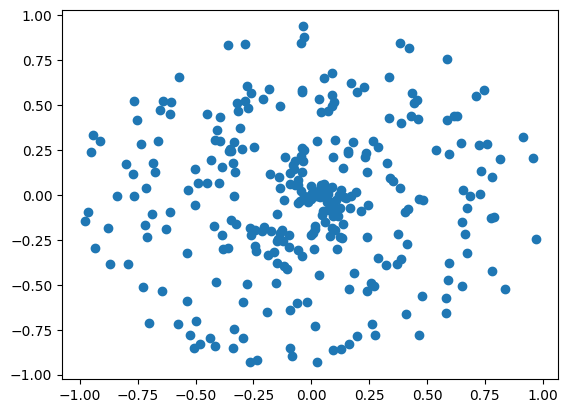

In [18]:

import matplotlib.pyplot as plt 
X, y = spiral_data(samples=100, classes=3) 
plt.scatter(X[:,0], X[:,1]) 
plt.show() 


you can determine all 3 classes separately, but this is a very challenging problem for a machine learning classifier to solve. Adding color to the chart makes this more clear:  


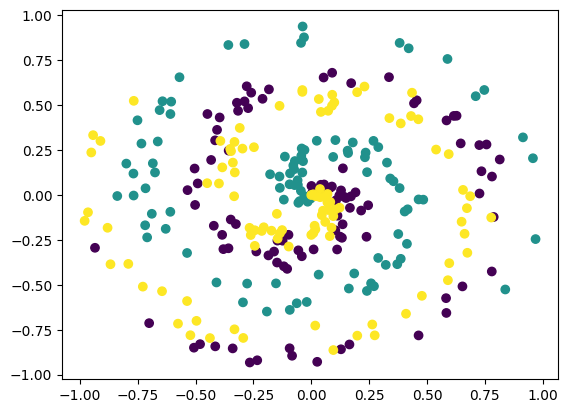

In [26]:

plt.scatter(X[:, 0], X[:, 1],c=y) 
plt.show() 



In the data above, each dot is the feature, and its coordinates are the samples that form the dataset. The **“classification”** for 
that dot has to do with which spiral it is a part of, depicted by blue, green, or red color in the previous image. These colors would then be assigned a class number for the model to fit to, like 0, 1, and 2.
                                                    

***
## ***Dense Layer Class***
***

Now that we no longer need to hand-type our data, we should create something similar for our various types of neural network layers. So far, we have only used what’s called a **dense** or **fully-connected layer**. These layers are commonly referred to as **“dense”** layers in papers, literature, and code, but you will occasionally see them called fully-connected or **“fc”** for short in code. 

In [36]:
import numpy as np 
import nnfs 
from nnfs.datasets import spiral_data
nnfs.init()

class Layer_Dense:

    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases 
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons) 
        self.biases = np.zeros((1, n_neurons))
    # Forward pass 
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

X, y = spiral_data(samples=100, classes=3) 

dense1 = Layer_Dense(2, 3) 
# Perform a forward pass of our training data through this layer 
dense1.forward(X) 
# Let's see output of the first few samples: 
print(dense1.output[:5]) 

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]
